<a href="https://colab.research.google.com/github/shreyus3003/Deep_Learning/blob/master/Home_work_4_Graded/dogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import pandas as pd

import time
from datetime import timedelta

import math
import os

import scipy.misc
from scipy.stats import itemfreq
from random import sample
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


import PIL.Image
from IPython.display import display


from zipfile import ZipFile
from io import BytesIO

In [0]:
from google.colab import drive
drive.mount('/content/drive')




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

train = ZipFile("/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/dog-breed-id/train.zip", 'r')
test = ZipFile("/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/dog-breed-id/test.zip", 'r')

train.namelist()[0:5]

len(train.namelist()[:]) - 1

10222

In [0]:

def db_creator(archivezip, nwidth, nheight, save_name):
 
    
  
    start = time.time()
    
    s = (len(archivezip.namelist()[:])-1, nwidth, nheight,3)
    allImg = np.zeros(s)
    for i in range(1,len(archivezip.namelist()[:])):
        fname = BytesIO(archivezip.read(archivezip.namelist()[i]))
        image = PIL.Image.open(fname) # open colour image
        image = image.resize((nwidth, nheight))
        image = np.array(image)
        image = np.clip(image/255.0, 0.0, 1.0) 
        allImg[i-1]=image
    

    pickle.dump(allImg, open( save_name + '.p', "wb" ) )
    

    end = time.time()

    time_dif = end - start

    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [0]:

image_resize = 60
db_creator(archivezip = train, nwidth = image_resize, 
                 nheight = image_resize , save_name = "/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/pickle/train")
db_creator(archivezip = test, nwidth = image_resize, 
                 nheight = image_resize , save_name = "/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/pickle/test")

Time usage: 0:01:01
Time usage: 0:01:34


In [0]:

train = pickle.load( open( "/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/pickle/train.p", "rb" ) )
train.shape

(10222, 60, 60, 3)

In [0]:

test = pickle.load( open( "/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/pickle/test.p", "rb" ) )
test.shape

(10357, 60, 60, 3)

In [0]:
plt.imshow(test[500,:,:,:])

In [0]:

path = "/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/dog-breed-id/labels.csv"
labels = pd.read_csv(path)

In [0]:

image_resize = 60
nwidth = image_resize
nheight = image_resize


s = (len(labels['breed']), nwidth, nheight,3) 
allImage = np.zeros(s)

i = 0
for f, breed in labels.values:
    image = PIL.Image.open('../content/train/{}.jpg'.format(f))
    image = image.resize((nwidth, nheight))
    image = np.array(image)
    image = np.clip(image/255.0, 0.0, 1.0) 
    i += 1
    allImage[i-1]=image

    train = allImage

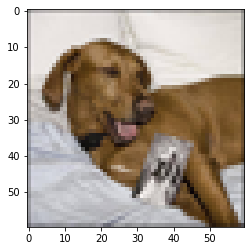

In [0]:
plt.imshow(train[200,:,:,:])
plt.show()

In [0]:
labels.sample(5)

,id,breed
9611,f1a18e29959bc5af735ebb5045f91b25,dhole
2238,37f1a6d8a5a2e3929afa8bdfc47aea2c,rhodesian_ridgeback
2392,3b8e713bd77cac3c4c0bfa228d784266,kelpie
3345,53114939929c74ccb6c64c373ed7bedb,gordon_setter
3773,5db15139f4f82e42088eef5678f0ab86,malinois


In [0]:
labels["breed"]

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [0]:
train_dir = '/content/train/'
test_dir = '/content/test/'

In [0]:

path = "/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/dog-breed-id/labels.csv"
labels = pd.read_csv(path)


breeds = list(labels.groupby('breed').count().sort_values(by='id', ascending=False).head(10).index)
labels = labels[labels['breed'].isin(breeds)]

labels['id'] = labels['id'] + '.jpg'
labels.head()

,id,breed
8,003df8b8a8b05244b1d920bb6cf451f9.jpg,basenji
9,0042188c895a2f14ef64a918ed9c7b64.jpg,scottish_deerhound
12,00693b8bc2470375cc744a6391d397ec.jpg,maltese_dog
57,0162b3e0144fb1d1ab82fbff3ace9938.jpg,shih-tzu
70,01b36cb1b80ab8c3a7d2b7128ad21bdc.jpg,samoyed


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH = 32
imagegen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=.1,
    width_shift_range=.1,
    height_shift_range=.1,
    rotation_range=30,
    horizontal_flip=True,
    validation_split=.2
    )
train_generator = imagegen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/train',
    x_col='id',
    y_col='breed',
    class_mode='categorical',
    target_size=(224,224),
    subset='training',
    batch_size=BATCH)
val_generator = imagegen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/train',
    x_col='id',
    y_col='breed',
    class_mode='categorical',
    target_size=(224,224),
    subset='validation',
    batch_size=BATCH)

Found 913 validated image filenames belonging to 10 classes.
Found 228 validated image filenames belonging to 10 classes.


In [0]:
train_generator

In [0]:
train = train_generator.image_data_generator
train
val = val_generator.image_data_generator
val

In [0]:
from keras.applications import VGG16

vgg16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

vgg16.summary()

In [0]:
import keras

model = keras.Sequential([
    vgg16, 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.compile(
    optimizer='adam', 
    loss=keras.losses.categorical_crossentropy, 
    metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import Adam


opt = Adam(lr=0.001)
base.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import os, datetime


log_dir = os.path.join("logs/vgg16-keras-transferlearning", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint = ModelCheckpoint("/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/vgg16.h5", 
                             monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


hist = model.fit_generator(steps_per_epoch=10,
                           generator=train_generator, validation_data= val_generator, 
                           validation_steps=10,epochs=10, 
                           callbacks=[tensorboard_callback, checkpoint,early], shuffle=True)

Epoch 1/10
 2/10 [=====>........................] - ETA: 15s - loss: 5.4103 - accuracy: 0.1250

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.226313). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


10/10 [==============================] - 11s 1s/step - loss: 3.3760 - accuracy: 0.0918 - val_loss: 2.2669 - val_accuracy: 0.0788


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
10/10 [==============================] - 7s 665ms/step - loss: 2.3268 - accuracy: 0.1063 - val_loss: 2.2941 - val_accuracy: 0.1027
Epoch 3/10
10/10 [==============================] - 7s 723ms/step - loss: 2.3145 - accuracy: 0.0969 - val_loss: 2.2946 - val_accuracy: 0.0685
Epoch 4/10
10/10 [==============================] - 8s 755ms/step - loss: 2.3082 - accuracy: 0.0875 - val_loss: 2.1845 - val_accuracy: 0.0985
Epoch 5/10
10/10 [==============================] - 6s 584ms/step - loss: 2.3068 - accuracy: 0.1213 - val_loss: 2.3036 - val_accuracy: 0.1062
Epoch 6/10
10/10 [==============================] - 6s 598ms/step - loss: 2.3007 - accuracy: 0.1311 - val_loss: 2.3587 - val_accuracy: 0.1062
Epoch 7/10
10/10 [==============================] - 7s 686ms/step - loss: 2.3041 - accuracy: 0.1031 - val_loss: 2.3033 - val_accuracy: 0.0925
Epoch 8/10
10/10 [==============================] - 7s 666ms/step - loss: 2.3005 - accuracy: 0.1219 - val_loss: 2.2885 - val_accuracy: 0.0947
Epoch 

In [0]:

opt = SGD(lr=0.001)
base.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

log_dir = os.path.join("logs/vgg16-keras-transferlearning", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint = ModelCheckpoint("/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/vgg16.h5", 
                             monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


hist = model.fit_generator(steps_per_epoch=10,
                           generator=train_generator, validation_data= val_generator, 
                           validation_steps=10,epochs=10, 
                           callbacks=[tensorboard_callback, checkpoint,early], shuffle=True)

Epoch 1/10
10/10 [==============================] - 9s 915ms/step - loss: 2.2888 - accuracy: 0.1094 - val_loss: 2.2615 - val_accuracy: 0.1404


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
10/10 [==============================] - 6s 650ms/step - loss: 2.2703 - accuracy: 0.1705 - val_loss: 2.2741 - val_accuracy: 0.0993
Epoch 3/10
10/10 [==============================] - 7s 709ms/step - loss: 2.2789 - accuracy: 0.1469 - val_loss: 2.2336 - val_accuracy: 0.1062
Epoch 4/10
10/10 [==============================] - 7s 738ms/step - loss: 2.2869 - accuracy: 0.1531 - val_loss: 2.2192 - val_accuracy: 0.1098
Epoch 5/10
10/10 [==============================] - 6s 553ms/step - loss: 2.2628 - accuracy: 0.1246 - val_loss: 2.2443 - val_accuracy: 0.1473
Epoch 6/10
10/10 [==============================] - 6s 622ms/step - loss: 2.1971 - accuracy: 0.1406 - val_loss: 2.2337 - val_accuracy: 0.1233
Epoch 7/10
10/10 [==============================] - 7s 690ms/step - loss: 2.2371 - accuracy: 0.1531 - val_loss: 2.2672 - val_accuracy: 0.1336
Epoch 8/10
10/10 [==============================] - 6s 630ms/step - loss: 2.1835 - accuracy: 0.1902 - val_loss: 2.0357 - val_accuracy: 0.1591
Epoch 